http://rstudio-pubs-static.s3.amazonaws.com/465250_5aa0123ad90e4b0187a8778a0230e67b.html

# Online Retail

## 一. <a href='#資料介紹'>資料介紹</a>

1. 來源
2. 資料介紹
3. 欄位
4. 延伸問題

## 二. <a href='#呈現'>呈現</a>
1. <a href='#1.-Load-Libraries'>Load Libraries</a>
2. <a href='#2.-Load-Data'>Load Data</a>
3. <a href='#3.-Data-Preprocessing'>Data Preprocessing</a>
    1. Drop Duplicates
    2. Missing Value
    3. Outlier
    4. Date Before 2011-12-01
    4. Date -> Year/Month/Hour
4. <a href='#4.-Analyze-Data'>Analyze Data</a>
5. <a href='#5.-Apriori-Algorithm'>Apriori Algorithm</a>
6. <a href='#6.-Feature-Engineering-&-Modeling'>Feature Engineering & Modeling</a>


## 三. <a href='#Apriori-Algorithm'>Apriori Algorithm</a>


---

## 資料介紹

### 1.來源
使用[UCI機器學習](https://archive.ics.uci.edu/ml/index.php)的[線上零售資料集](http://archive.ics.uci.edu/ml/datasets/Online+Retail)


### 2.資料介紹
- 資料包含了從2010年12月1日至2011年12月9日之間，在英國註冊的線上零售的所有交易數據。

- 因為2011年12月的資料不滿一個月，所以資料會取 2010年12月1日到2011年11月30日來分析

- 該公司主要銷售獨特的禮品，許多客戶都是批發商，客戶來自各個國家。

### 3.欄位

Shape：(541909, 8)


英文欄位|中文欄位|描述
:---:|:---:|:---:
InvoiceNo|訂單編號|每筆交易分配唯一的6位整數，需注意退貨訂單的代碼以字母'c'開頭。
StockCode|產品編號|每個不同的產品分配唯一的5位整數
Description|產品名稱|對每件產品的簡略描述。
Quantity|購買數量|每筆交易的每件產品的數量。
InvoiceDate|交易日期及時間|每筆交易發生的日期和時間。
UnitPrice|產品單價|單位產品價格。
CustomerID|客戶ID|每個客戶分配唯一的5位整數。
Country|客戶所在國家|每個客戶所在國家/地區的名稱。

### 4. 延伸問題

1. 哪些產品最受歡迎，被瀏覽的次數最多，購買的次數最多？

2. 哪些用戶是最有價值的用戶，在特定的時間範圍內消費總額最高，這些高價值用戶有什麼樣的用戶特徵？

3. 哪些用戶是最忠誠的用戶，回購率最高用戶，如何提高這些用戶的消費體驗，增加消費額度？

4. 用戶的消費習慣是什麼，哪些產品是用戶們喜歡一起購買的？或者有特定的購買時間順序？

5. 促銷對於哪些用戶最有效，哪些用戶反應最活躍？促銷策略能夠考慮這些因素

<a href='#Online-Retail'>Back To Top</a>

---

## 呈現

## 1. Load Libraries

In [156]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

%matplotlib inline
pd.set_option('display.float_format',lambda x : '%.2f' % x)
sns.set()

In [157]:
%%html
<style>table {float:left}</style>

<a href='#Online-Retail'>Back To Top</a>

---

## 2. Load Data

In [158]:
dataset = pd.read_csv("../input/Online_Retail.csv")

### 資料筆數：(541909, 8)

In [159]:
dataset.shape

(541909, 8)

In [160]:
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010/12/1 8:26,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010/12/1 8:26,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010/12/1 8:26,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010/12/1 8:26,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010/12/1 8:26,3.39,17850.00,United Kingdom


In [161]:
dataset.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

<a href='#Online-Retail'>Back To Top</a>

---

## 3. Data Preprocessing
1. Drop Duplicates
2. Missing Value
    - CustomerID：135037
    - Description：1454
3. Outlier
3. Date -> Year/Month/Hour

方法|刪除多少筆資料|剩多少筆資料
:---:|:---:|:---:
Drop Duplicates|5,268|536,641
Missing Value|135,037|401,604
Outlier(Quantity + UnitPrice)|8,912|392,692
Drop Date After 2011-11-30|17,026|375,666

### 3.1 Drop Duplicates

In [162]:
dataset = dataset.drop_duplicates(subset=['InvoiceNo','StockCode','Description','Quantity','InvoiceDate','UnitPrice','CustomerID','Country'])
duplicates_length = 541909-dataset.shape[0]
print('Drop Duplicates : ', duplicates_length)
print('Dataset Now : ', dataset.shape[0])

Drop Duplicates :  5268
Dataset Now :  536641


---

### 3.2 Missing Value

In [163]:
def na_check(df):
    missing_data = pd.DataFrame(dataset.isnull().sum(), columns=['missing'])
    missing_data = missing_data.sort_values(ascending=False, by=['missing'])
    missing_data = missing_data[missing_data['missing']>0]
    display(missing_data)
na_check(dataset)

,missing
CustomerID,135037
Description,1454


#### 因為要研究用戶的消費行為以及產品的銷售情況，所以把用戶ID或者產品ID缺失的數據刪除。

In [164]:
dataset = dataset.dropna(subset=['InvoiceNo','CustomerID'],how='any')
missing_length = 541909-duplicates_length-dataset.shape[0]
print('Drop Missing Value: ',missing_length)
print('Dataset Now : ', dataset.shape[0])

Drop Missing Value:  135037
Dataset Now :  401604


---

### 3.3 Outlier

In [165]:
dataset.describe()

,Quantity,UnitPrice,CustomerID
count,401604.00,401604.00,401604.00
mean,12.18,3.47,15281.16
std,250.28,69.76,1714.01
min,-80995.00,0.00,12346.00
25%,2.00,1.25,13939.00
50%,5.00,1.95,15145.00
75%,12.00,3.75,16784.00
max,80995.00,38970.00,18287.00


#### Quantity, UnitPrice

1. 購買產品的數量最小值為-8095
2. 單品單價為0

-> 將這兩個不符合實際情況的異常值刪除

In [166]:
Quantity_num = len(dataset[dataset['Quantity']<0])
UnitPrice_num = len(dataset[dataset['UnitPrice']<=0])
dataset = dataset[dataset['Quantity']>0]
dataset = dataset[dataset['UnitPrice']>0]

print('Drop Quantity <0 : ', Quantity_num)
print('Drop UnitPrice <0 : ', UnitPrice_num)
print('Drop Quantity + UnitPrice：', Quantity_num+UnitPrice_num)
print('Dataset Now : ', dataset.shape[0])

Drop Quantity <0 :  8872
Drop UnitPrice <0 :  40
Drop Quantity + UnitPrice： 8912
Dataset Now :  392692


---

### 3.4 Date -> Year/Month/Hour

#### 把Date這個變數，再細分出Year/Month/Hour，以便後續資料視覺化

In [167]:
dataset['Year'] = dataset['InvoiceDate'].map(lambda x:x.split('/')[0])
dataset['Month'] = dataset['InvoiceDate'].map(lambda x:x.split('/')[1])
dataset['Date'] = dataset['InvoiceDate'].map(lambda x:x.split('/')[2].split(' ')[0])
dataset['Hour'] = dataset['InvoiceDate'].map(lambda x:x.split(' ')[1].split(':')[0])
dataset['Yaer_Month'] = dataset['Year'] + '-' + dataset['Month'] 


In [168]:
dataset.loc[:,'InvoiceDate']=pd.to_datetime(dataset.loc[:,'InvoiceDate'],
                                                   format='%Y-%m-%d',
                                                   errors='coerce')

In [169]:
dataset['Week'] = dataset['InvoiceDate'].map(lambda x:x.weekday())+1

In [170]:
dataset.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Date,Hour,Yaer_Month,Week
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.00,France,2011,12,9,12,2011-12,5
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.00,France,2011,12,9,12,2011-12,5
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.00,France,2011,12,9,12,2011-12,5
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.00,France,2011,12,9,12,2011-12,5
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.00,France,2011,12,9,12,2011-12,5


---

### 3.5 Date Before 2011-12-01

In [171]:
After_20111201_num = len(dataset[(dataset.loc[:,'Year']=='2011') & (dataset.loc[:,'Month']=='12')])
dataset = dataset[-((dataset.loc[:,'Year']=='2011') & (dataset.loc[:,'Month']=='12'))]

print('Data After 2011-12-01 : ', After_20111201_num)
print('Dataset Now : ', dataset.shape[0])

Data After 2011-12-01 :  17026
Dataset Now :  375666


---

<a href='#Online-Retail'>Back To Top</a>

## 4. Analyze Data

1. 月份交易數
2. 星期交易數
3. 小時交易數

In [174]:
dataset['Description'] = dataset['Description'].str.title()

計算結果顯示2011年9月、10月、11月的銷售單數穩步增長，2011年11月達到最高值2657單，懷疑平台年末促銷或者換季用戶大量購買冬季產品導致，可以通過查詢銷售額佔比最高的產品確認。

In [184]:
dataset['Amount'] = dataset.Quantity * dataset.UnitPrice
monthly_sales = dataset.groupby(['Yaer_Month'])['Amount'].sum()
monthly_sales.to_frame().to_csv('monthly_sales.csv')
monthly_sales = pd.read_csv('monthly_sales.csv')
monthly_sales['index'] =  ['01', '02', '11', '12', '03', '04', '05', '06', '07', '08', '09', '10']
monthly_sales = monthly_sales.sort_values(by=['index']).drop(['index'], axis=1)

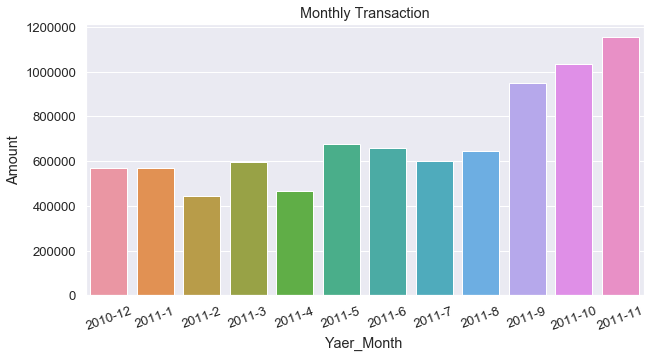

In [192]:
fig, ax = plt.subplots(figsize=(10,5))
sns.set(font_scale =1.2)

sns.barplot(x="Yaer_Month", y="Amount", data=monthly_sales) 
ax.set_title('Monthly Transaction')
ax.set_xticklabels(ax.get_xticklabels(),rotation=20)
plt.show()

In [188]:
# InvoiceNo包含同一個人買的不同東西，所以要用unique InvoiceNo去計算
Unique_InvoiceNo=dataset.drop_duplicates(subset=['InvoiceNo'])
monthly_trans=Unique_InvoiceNo.groupby(['Yaer_Month'])['InvoiceNo'].count()
monthly_trans.to_frame().to_csv('monthly_trans.csv')
monthly_trans = pd.read_csv('monthly_trans.csv')
monthly_trans['index'] =  ['01', '02', '11', '12', '03', '04', '05', '06', '07', '08', '09', '10']
monthly_trans = monthly_trans.sort_values(by=['index']).drop(['index'], axis=1)

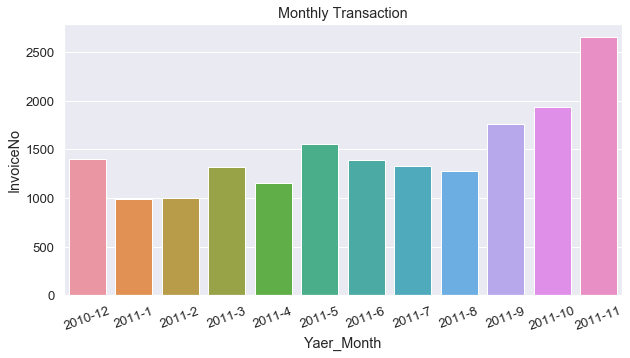

In [189]:
fig, ax = plt.subplots(figsize=(10,5))
sns.set(font_scale =1.2)

sns.barplot(x="Yaer_Month", y="InvoiceNo", data=monthly_trans) 
ax.set_title('Monthly Transaction')
ax.set_xticklabels(ax.get_xticklabels(),rotation=20)
plt.show()

In [193]:
Unique_InvoiceNo=dataset.drop_duplicates(subset=['InvoiceNo'])
weekly_trans=Unique_InvoiceNo.groupby(['Week'])['InvoiceNo'].count()
weekly_trans

Week
1    2747
2    3074
3    3351
4    3801
5    2674
7    2107
Name: InvoiceNo, dtype: int64

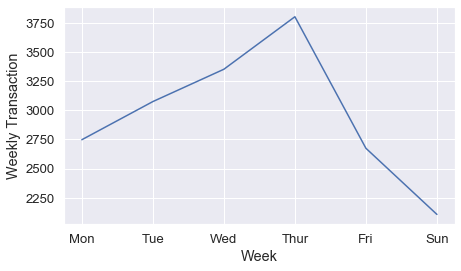

In [194]:
fig,ax = plt.subplots(figsize=(7,4))
x = ['Mon', 'Tue','Wed','Thur','Fri','Sun']
y = weekly_trans
plt.plot(x,y)
plt.xlabel('Week')
plt.ylabel('Weekly Transaction')
plt.show()

In [195]:
Unique_InvoiceNo=dataset.drop_duplicates(subset=['InvoiceNo'])
hourly_trans=Unique_InvoiceNo.groupby(['Hour'])['InvoiceNo'].count()
hourly_trans.to_frame().to_csv('hourly_trans.csv')
hourly_trans = pd.read_csv('hourly_trans.csv')
hourly_trans = hourly_trans.sort_values(by=['Hour'])

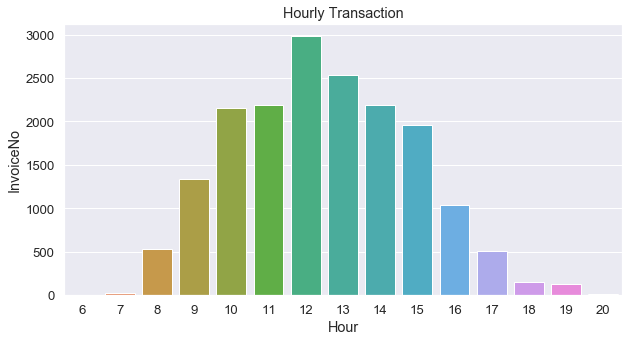

In [196]:
fig, ax = plt.subplots(figsize=(10,5))
sns.set(font_scale =1.2)

sns.barplot(x="Hour", y="InvoiceNo", data=hourly_trans) 
ax.set_title('Hourly Transaction')
ax.set_xticklabels(ax.get_xticklabels())
plt.show()

In [114]:
Top_trans = dataset.groupby(['Description'])['Quantity'].sum()
Top_trans.to_frame().to_csv('Top_trans.csv')
Top_trans = pd.read_csv('Top_trans.csv')
Top_trans = Top_trans.sort_values(['Quantity'], ascending=False)[:10]
Top_trans['Description_Chinese'] = ['玻璃罐', '滑翔機', '紅色紙袋', '心型白色燈飾', '裝飾鳥', '72個杯子蛋糕盒', '迷你調色盤', '爆米花袋', '12包裝衛生紙', '60個杯子蛋糕盒']
Top_trans['Description_Short'] = ['Storage Jar', 'Gliders', 'Red Bag', 'Heart Light Holder', 'Bird Ornament', '72 Cake Cases', 'Mini Paint', 'Popcorn Holder', 'Tissues', '60 Cake Cases']
Top_trans

,Description,Quantity,Description_Chinese,Description_Short
1986,Medium Ceramic Top Storage Jar,77729,玻璃罐,Storage Jar
3777,World War 2 Gliders Asstd Designs,52956,滑翔機,Gliders
1761,Jumbo Bag Red Retrospot,45023,紅色紙袋,Red Bag
3689,White Hanging Heart T-Light Holder,35961,心型白色燈飾,Heart Light Holder
216,Assorted Colour Bird Ornament,33989,裝飾鳥,Bird Ornament
2262,Pack Of 72 Retrospot Cake Cases,33386,72個杯子蛋糕盒,72 Cake Cases
2041,Mini Paint Set Vintage,25785,迷你調色盤,Mini Paint
2591,Popcorn Holder,25557,爆米花袋,Popcorn Holder
2228,Pack Of 12 London Tissues,24712,12包裝衛生紙,Tissues
2260,Pack Of 60 Pink Paisley Cake Cases,24014,60個杯子蛋糕盒,60 Cake Cases


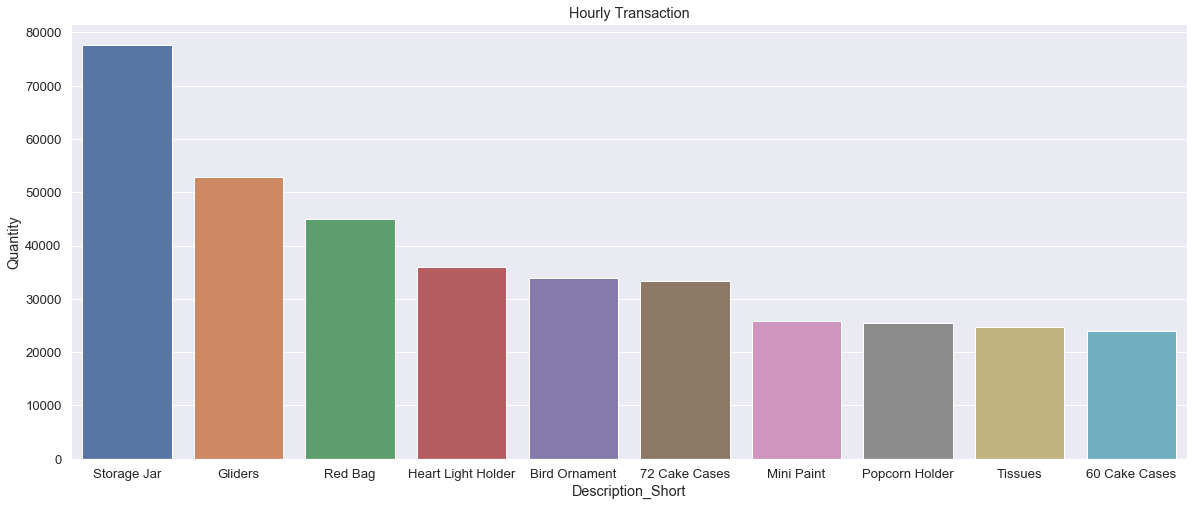

In [115]:
fig, ax = plt.subplots(figsize=(20,8))
sns.set(font_scale =1.2)

sns.barplot(x="Description_Short", y="Quantity", data=Top_trans, orient='H') 
ax.set_title('Hourly Transaction')
ax.set_xticklabels(ax.get_xticklabels())
plt.show()

In [116]:
num = dataset['Quantity'].quantile(.999)

In [117]:
new = dataset[dataset['Quantity']<=504]

In [118]:
Top_trans = new.groupby(['Description'])['Quantity'].sum()
Top_trans.to_frame().to_csv('Top_trans.csv')
Top_trans = pd.read_csv('Top_trans.csv')
Top_trans = Top_trans.sort_values(['Quantity'], ascending=False)[:10]
Top_trans

,Description,Quantity
1761,Jumbo Bag Red Retrospot,41823
3776,World War 2 Gliders Asstd Designs,29532
3688,White Hanging Heart T-Light Holder,28979
216,Assorted Colour Bird Ornament,28941
2262,Pack Of 72 Retrospot Cake Cases,27026
3524,Victorian Glass Hanging T-Light,19545
1759,Jumbo Bag Pink Polkadot,18219
1936,Lunch Bag Red Retrospot,17219
2591,Popcorn Holder,17165
2260,Pack Of 60 Pink Paisley Cake Cases,16634


Jumbo bag red retpospot 銷量在八月達到高峰，且持續維持高檔，可能是九月之後國外節慶較多，像是十月的萬聖節、十一月的感恩節、十二月的聖誕節。都需要有送禮的需求，因此紙袋銷量暴增。

Assprted cp;our bird ornament 銷量於7月後直線上升，且在11月達到高峰，可能是因為感恩節與聖誕節要到了因此買裝飾品裝飾家裡。

World war 2 gliders asstd designs從年初銷量持續穩定的增加，這種小玩具在Amazon屬於前100的熱銷產品，上網去查了一下他已經賣出約1,084,303 件，價格較便宜且拿來送禮或買給小朋友玩都很適合。

White hanging heart T-light holder在十一月銷量急遽上升，可能是需要送給太太或女朋友的聖誕禮物，且這種蠟燭座是使用電力來營造如蠟燭般的效果，更具有情調。

Pack of 72 retrospot cake cases在三月與十二月銷量顯著大於其他月份，四月有復活節，十二月有聖誕節，兩個重要節慶外國人常常開派對慶祝，蛋糕紙因為烤蛋糕的需求上升而顯著增加。

Victorian glass hanging T-light的每月銷量變化十分極端。

Popcorn holder 在十一月銷量暴增，可能也是因應節慶需求。

Rabbit night light 在11月銷量大增，可能也是受到節慶影響。

Jumbo bag pink polkadot在六月到九月這段時間熱銷，可能是夏天大家戶外活動，進入冬天之後銷量顯著下滑。

Lunch bag red retrospot在五月到八月這段時間熱銷，可能是夏天大家喜歡出去從事野餐等戶外活動，進入冬天之後銷量顯著下滑，表示野餐袋這產品可能會受到季節性因素影響。

從上述十件年度熱銷產品的銷售月份變化發現，購物行為很容易受到節慶的影響而有顯著差異。



<a href='#Online-Retail'>Back To Top</a>

## 5. Apriori Algorithm

### 1. Support (支持度) : 意思是某特定種類在所有種類的比重
```
例如我有100名會員，其中有20名購買過雨具，則support(雨具) = 20% 。
```
### 2. Confidence (信賴度) : 意思是某A種類中，含有某B種類的比重
```
例如我有100名會員，其中40人買過涼鞋，而這40買過涼鞋者當中，又另有10人買過雨具，
則confidence(涼鞋->雨具) = 10/40 = 25% 。
```
### 3. Lift (提升度) : 意思為某兩者關係的比值
```
如果小於1 代表兩者是負相關，等於1 表示兩者獨立，大於1 表示兩者正相關，
公式為confidence(A->B) / support(B) 
帶入上述例子可表示成 lift(涼鞋->雨具) = 25/20 = 1.25 
```

In [119]:
df = dataset.copy()

In [120]:
df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df = df[~df['InvoiceNo'].str.contains('C')]

In [121]:
basket = (df[df['Country'] =="France"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

In [122]:
basket

Description,10 Colour Spaceboy Pen,12 Coloured Party Balloons,12 Egg House Painted Wood,12 Message Cards With Envelopes,12 Pencil Small Tube Woodland,12 Pencils Small Tube Red Retrospot,12 Pencils Small Tube Skull,12 Pencils Tall Tube Posy,12 Pencils Tall Tube Red Retrospot,12 Pencils Tall Tube Woodland,...,Wrap Suki And Friends,Wrap Vintage Petals Design,Yellow Coat Rack Paris Fashion,Yellow Giant Garden Thermometer,Zinc Star T-Light Holder,Zinc Folkart Sleigh Bells,Zinc Herb Garden Container,Zinc Metal Heart Decoration,Zinc T-Light Holder Star Large,Zinc T-Light Holder Stars Small
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
536852,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
536974,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
537065,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
537463,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579529,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
579634,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
579708,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [123]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets.drop('Postage', inplace=True, axis=1)


In [124]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)

In [125]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Alarm Clock Bakelike Red),(Alarm Clock Bakelike Green),0.09,0.09,0.08,0.82,8.99,0.07,5.15
1,(Alarm Clock Bakelike Green),(Alarm Clock Bakelike Red),0.09,0.09,0.08,0.82,8.99,0.07,5.15
2,(Alarm Clock Bakelike Red),(Alarm Clock Bakelike Pink),0.09,0.09,0.07,0.76,8.11,0.06,3.85
3,(Alarm Clock Bakelike Pink),(Alarm Clock Bakelike Red),0.09,0.09,0.07,0.74,8.11,0.06,3.53
4,(Spaceboy Lunch Box),(Dolly Girl Lunch Box),0.13,0.11,0.08,0.58,5.55,0.06,2.15


In [126]:
rules[ (rules['lift'] >= 6) &
       (rules['confidence'] >= 0.8)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Alarm Clock Bakelike Red),(Alarm Clock Bakelike Green),0.09,0.09,0.08,0.82,8.99,0.07,5.15
1,(Alarm Clock Bakelike Green),(Alarm Clock Bakelike Red),0.09,0.09,0.08,0.82,8.99,0.07,5.15
20,(Set/6 Red Spotty Paper Plates),(Set/6 Red Spotty Paper Cups),0.13,0.14,0.13,0.96,6.71,0.11,21.00
21,(Set/6 Red Spotty Paper Cups),(Set/6 Red Spotty Paper Plates),0.14,0.13,0.13,0.89,6.71,0.11,7.67
28,"(Set/20 Red Retrospot Paper Napkins, Set/6 Red...",(Set/6 Red Spotty Paper Cups),0.11,0.14,0.10,0.97,6.82,0.09,33.43
29,"(Set/20 Red Retrospot Paper Napkins, Set/6 Red...",(Set/6 Red Spotty Paper Plates),0.11,0.13,0.10,0.97,7.38,0.09,33.85


In [140]:
basket2 = (df[df['Country'] =="Germany"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

basket_sets2 = basket2.applymap(encode_units)
basket_sets2.drop('Postage', inplace=True, axis=1)
frequent_itemsets2 = apriori(basket_sets2, min_support=0.05, use_colnames=True)
rules2 = association_rules(frequent_itemsets2, metric="lift", min_threshold=1)

rules2[ (rules2['lift'] >= 4) &
        (rules2['confidence'] >= 0.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(Plasters In Tin Circus Parade),(Plasters In Tin Woodland Animals),0.11,0.13,0.07,0.58,4.33,0.05,2.06
8,(Plasters In Tin Spaceboy),(Plasters In Tin Woodland Animals),0.11,0.13,0.06,0.57,4.28,0.05,2.03
12,(Red Retrospot Charlotte Bag),(Woodland Charlotte Bag),0.07,0.13,0.06,0.87,6.72,0.05,6.75
